In [4]:
import os
CONFIG_PATH = "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [5]:
WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = WEIGHTS_NAME
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

groundingdino_swint_ogc.pth ; exist: True


In [6]:
from groundingdino.util.inference import load_model, load_image, predict, annotate

c:\Users\Juanma\anaconda3\envs\new-tfg\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
model = load_model(CONFIG_PATH, WEIGHTS_PATH)

c:\Users\Juanma\anaconda3\envs\new-tfg\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
import matplotlib.pyplot as plt
import csv

c:\Users\Juanma\anaconda3\envs\new-tfg\lib\site-packages\transformers\modeling_utils.py:810: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
c:\Users\Juanma\anaconda3\envs\new-tfg\lib\site-packages\torch\utils\checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


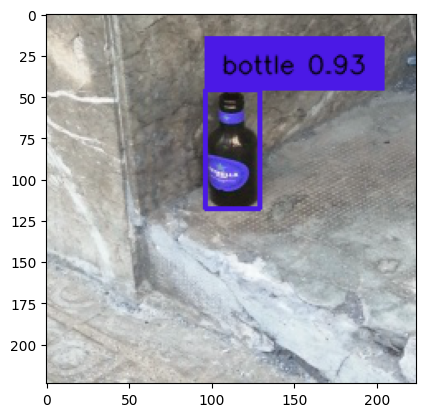

In [9]:
IMAGE_NAME = "test_final_images\\Verde\\1288_20230331_184907_BOTELLA_CRISTAL.jpg"
IMAGE_PATH = IMAGE_NAME

TEXT_PROMPT = "bottle"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

plt.imshow(annotated_frame)
plt.show()

In [10]:
CLASES = 'objetos.csv'
PROMPT = '{}'
with open(CLASES, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    clases = list(reader)

eng_sub_clases = [clase[1] for clase in clases]
esp_sub_clases = [clase[0] for clase in clases]
clases = [clase[2] for clase in clases]

final_promps = [PROMPT.format(promp2).lower() for promp2 in eng_sub_clases]
final_promps = ', '.join(final_promps)
print(final_promps)

ceramic vase, plastic cup, bottle cap, blender, varnish, electric toothbrush, hair straightener, nickel battery, cat litter, gift ribbons and tapes, bulk food container, battery, plastic bag, stoves, sweeping dust, photo frame, console, video game, glass yogurt, debris, pencil sharpener, cork stoppers, animal excrement, depilatory wax cartridges, rag, glass ashtray, cooking oil, nail file, computer screens, glass bottle, kitchen robot, dishwasher, router, vinyl record, shampoo bottle, pvc tube, sanitary mask, fruit bones, toner, diapers, pads, tampons, lamp, bulb, cigarette box, paper sheets, polystyrene trays, microphone, medicine box, dirty brush, baby bottle, broken plates, sewing needles, wooden sticks, plastic container for chocolates, video and dvd player, ceramic pot, glass jar, headphones, cardboard cookie box, toaster, newspapers, glass medicine bottle, fruit net, fruit, toothbrush, boilers and tanks, soil for plants, washing machine, alkaline batteries, plastic snack bag, pap

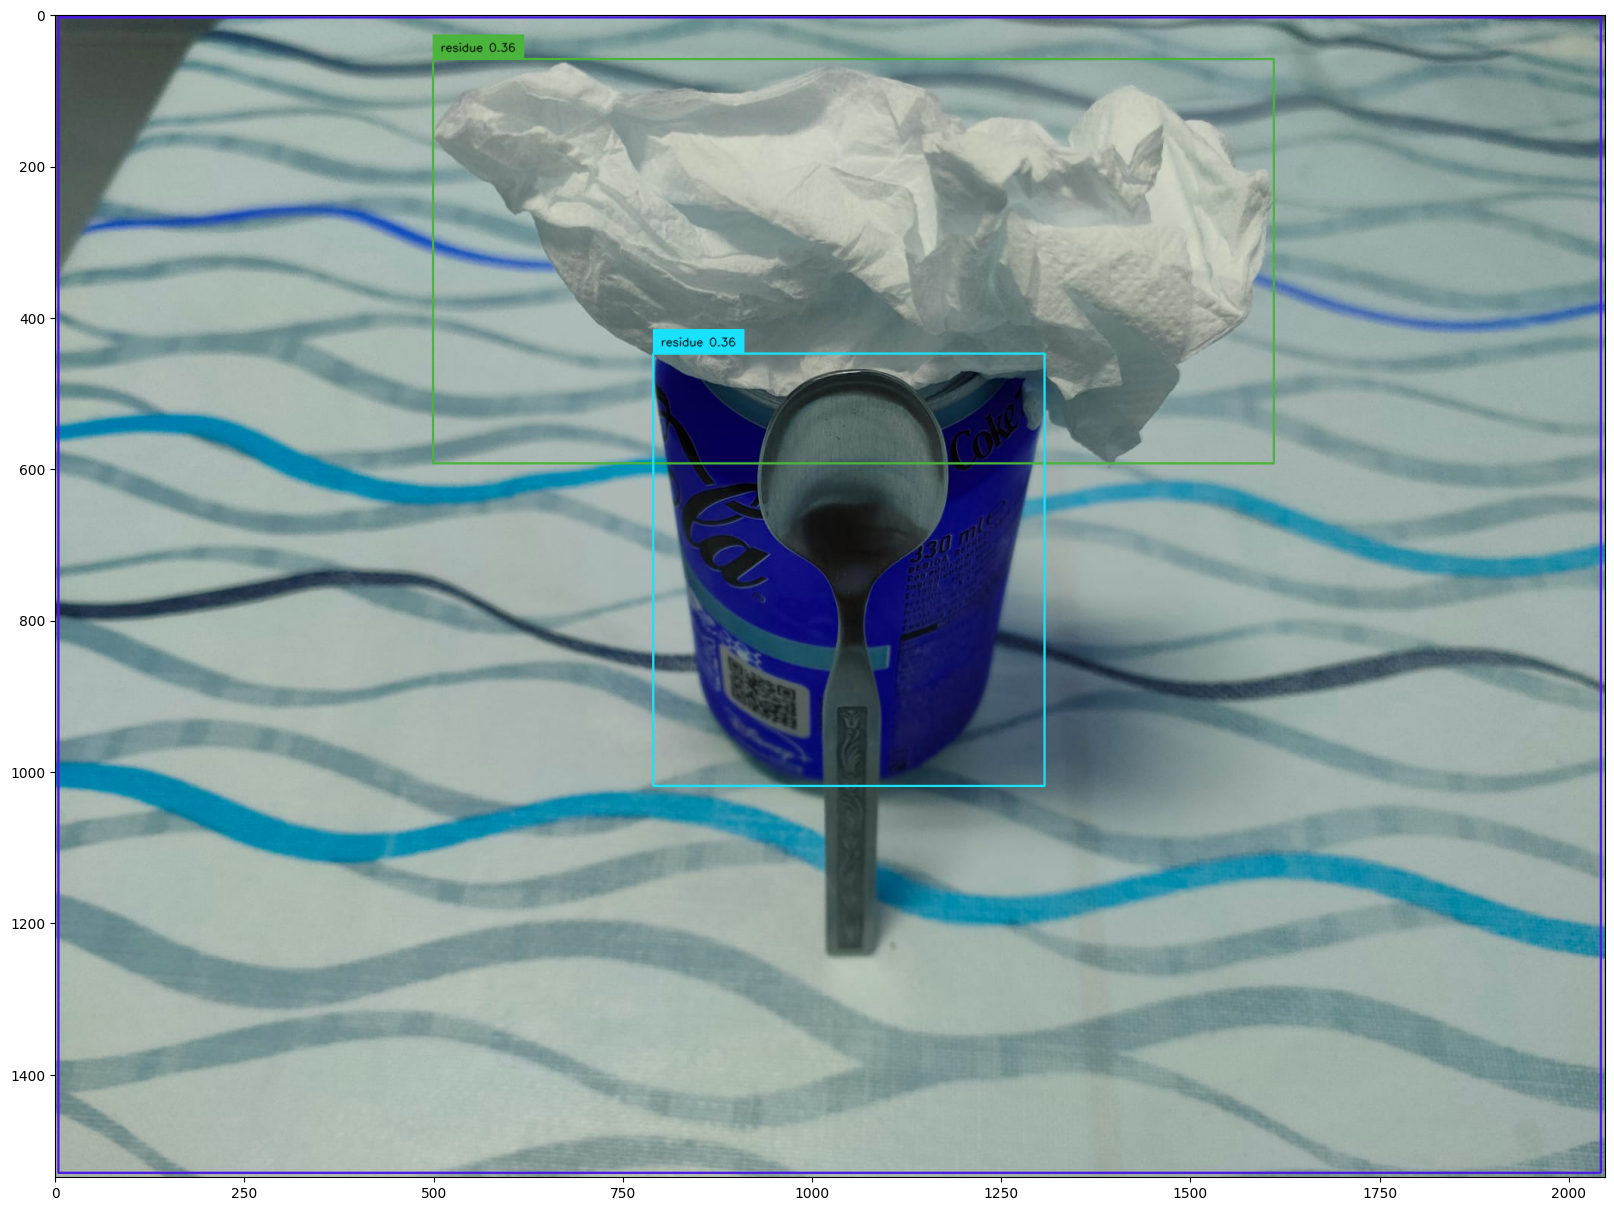

In [29]:
IMAGE_NAME = r"test_images\complex.jpeg".replace('\\', '/')
IMAGE_PATH = IMAGE_NAME

TEXT_PROMPT =  'residue'
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

plt.figure(figsize=(20, 20))
plt.imshow(annotated_frame)
plt.show()